<a href="https://colab.research.google.com/github/GabrielaRomoM/SIGNALS-THEORY_2024-1/blob/main/ExercisePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y Señal Original

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
#Frecuencia angular general y vector de tiempo
f = 10
w = 2*np.pi*f
T = 1/f
N = 1024
t = np.linspace(0,5*T,N)

#Señales particulares
x1 = np.cos(w*t)
x2 = 1/3*(np.sin(3*w*t))
x3 = 1/5*(np.sin(5*w*t))

#Señal original para la red
xt = x1-x2+x3

# Función generadora de la matriz de entrada
Con esta función generamos no solo el ruido en sus 5 diferentes niveles, sino que  se realiza la suma con la señal original para generar la matriz que ingresará a la red

In [ ]:
def generate_gaussian_noise(mean=0, stds=[0.1,0.5,1,3], size=1024, num_signals=250):
    H = []

    for std in stds:
      for i in range(0,num_signals,1):
        noise = np.random.normal(0, std, size)
        noisy_signal = xt + noise
        H.append(noisy_signal)
    return np.array(H)

# Generación de la matriz de entrada y salida
Generamos la matriz de entrada con la función de ruido, luego transformamos esta misma matriz con el método de Welch y obtenemos la matriz que funcionará como la salida de mi modelo

In [ ]:
#Generación de la matriz con señales de ruido
M_ruido = generate_gaussian_noise()

#Transformación de la matriz
fr,PSD = sig.welch(M_ruido,nperseg=1024)

# Preparación de los datos para la Red
Separamos nuestros datos para entrenamiento y testeo, escalamos los mismos para mejorar el trabajo de la Red

In [ ]:
#Separación de datos
x_train, x_test, y_train, y_test = train_test_split(M_ruido, PSD, test_size=0.3, random_state=50)

#Funciones de escalamiento separados en entradas y salidas
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#Escalado de las entradas
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(y_train)

#Escalado de las salidas
x_test = scaler_x.transform(x_test)
y_test = scaler_y.transform(y_test)

# Definición del modelo

In [ ]:
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(1024,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(513,activation='linear'))

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss='mse',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=20,validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0638 - loss: 0.0475 - val_accuracy: 0.7071 - val_loss: 0.0179
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6604 - loss: 0.0190 - val_accuracy: 0.7500 - val_loss: 0.0153
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6925 - loss: 0.0181 - val_accuracy: 0.7500 - val_loss: 0.0143
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7617 - loss: 0.0140 - val_accuracy: 0.7500 - val_loss: 0.0137
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7460 - loss: 0.0136 - val_accuracy: 0.7500 - val_loss: 0.0130
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7258 - loss: 0.0140 - val_accuracy: 0.7500 - val_loss: 0.0124
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7376 - loss: 0.0127 - val_accuracy: 0.7500 - val_loss: 0.0118
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7580 - loss: 0.0112 - val_accuracy: 0.7500 - v

Text(0.5, 0, 'Epoch')

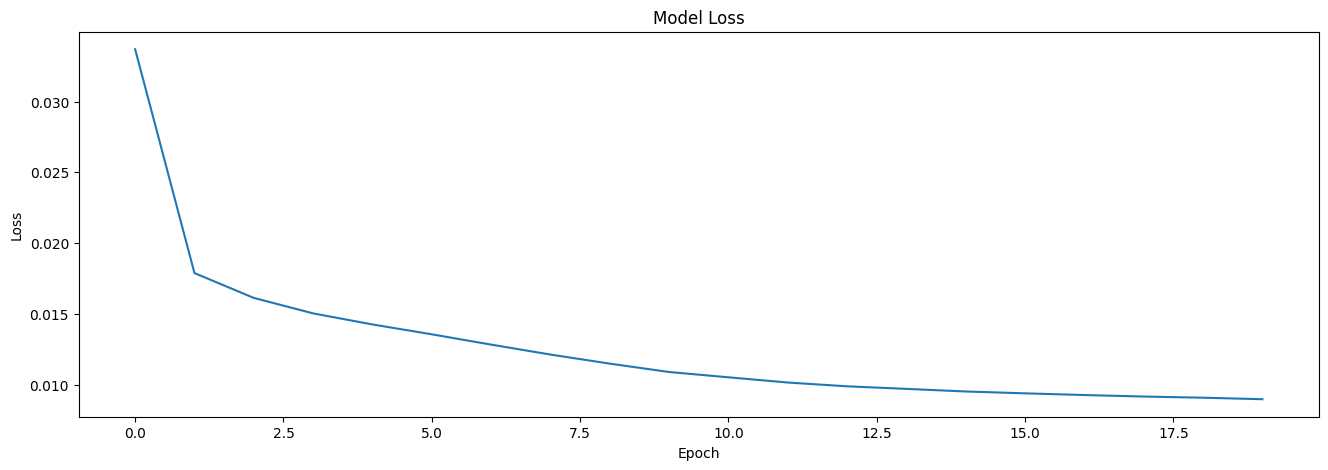

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

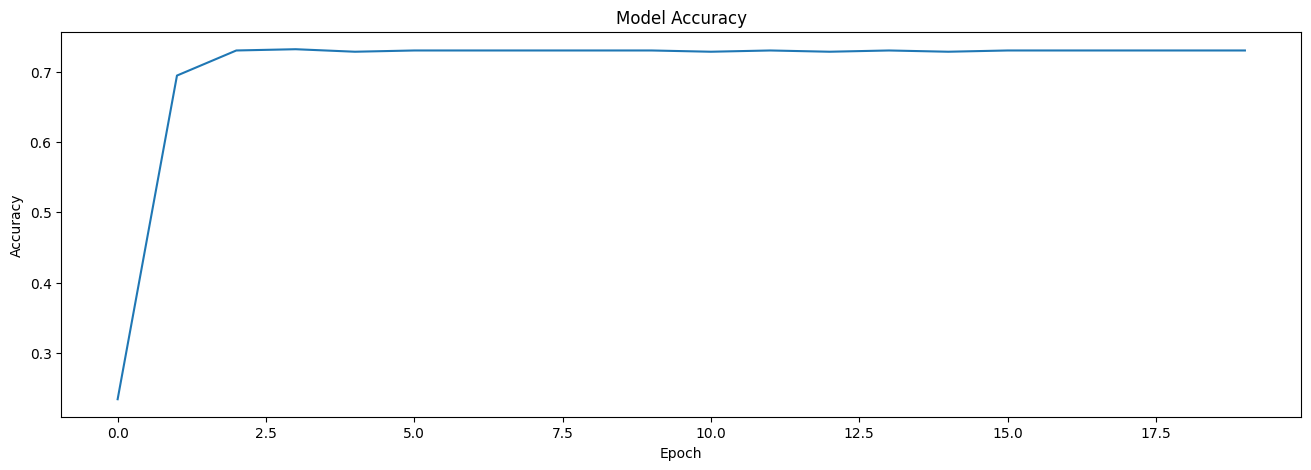

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
model.evaluate(x_test,y_test)

y = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 0.0107 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


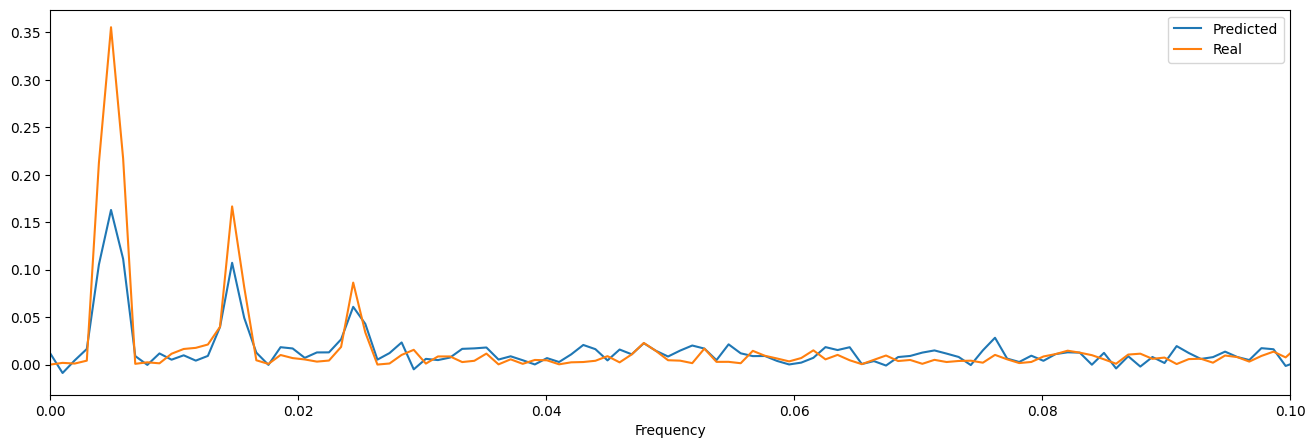

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(fr,y[1],label='Predicted')
plt.plot(fr,y_test[1],label='Real')
plt.xlabel('Frequency')
plt.xlim(0,0.1)
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 513)                 │         263,169 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,971,461 (7.52 MB)

 Trainable params: 657,153 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,314,308 (5.01 MB)

#Explicaciones

En base al model.summary(), mi modelo cuenta con 3 capas densas. Esta configuración se da después de muchos ensayos para conseguir la mayor precisión posible; en la primera capa se cuentan con 256 neuronas con la especificación de que la entrada es de 1024 muestras en el tiempo, la segunda de 512 muestras es una capa oculta de procesamiento de datos, y la final de 513 (que son la cantidad de muestras en frecuencia que necesitamos para nuestras señales) se encarga de realizar la salida de los datos de PSD.

Para los métodos de activación: las primeras 2 capas utilizan una bastante general, "ReLu", ayuda a la eficacia del modelo y a reducir la carga computacional; la última capa es "Linear", ayuda en la predicción de datos continuos, como nuestras señales.

En la sección del optimizador, opto por Adam (Adaptive Moment Estimation), tiene ventajas para la adaptabilidad de un modelo con datos nuevos, y cambiamos el radio de aprendizaje a un valor bajo (0.00001) para evitar el sobreajuste y la memorización del modelo lo máximo posible.

En la copilación del modelo especifíco que quiero obtener los valores de "loss" en base al "error cuadrático medio" (MSE) y el de accuracy, para luego realizar las gráficas respectivas para el análisis del modelo.

Por último, en el entrenamiento del modelo, defino 15 épocas ya que la tarea a realizar es "técnicamente" sencillo para la red y no quiero un sobreajuste de datos ni una pérdida de tiempo con un exceso de épocas.

La validación se tomó en un 20% en base a la solicitud dada en clase.

# Predicciones

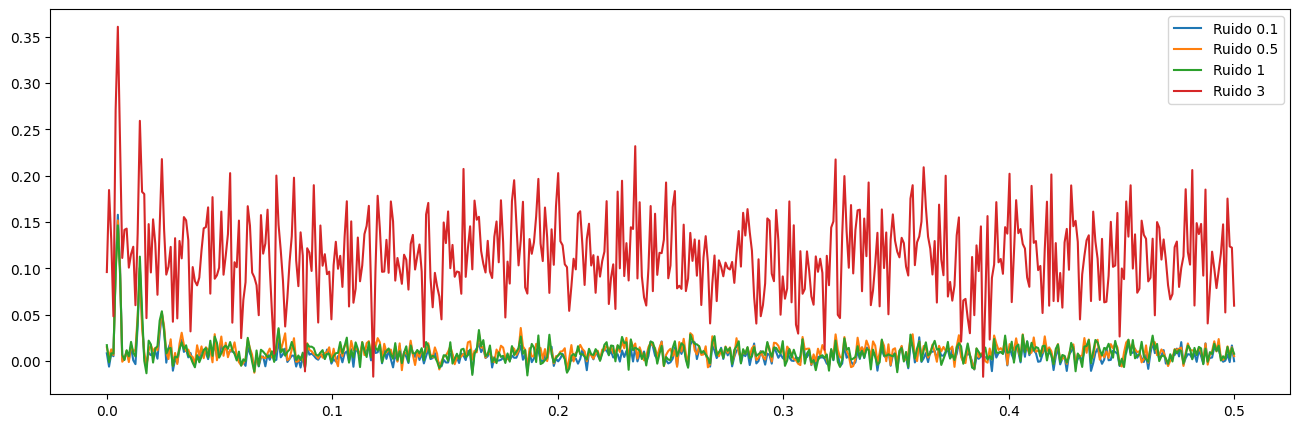

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(fr,y[199],label='Ruido 0.1')
plt.plot(fr,y[0],label='Ruido 0.5')
plt.plot(fr,y[299],label='Ruido 1')
plt.plot(fr,y[99],label='Ruido 3')
plt.legend()
plt.show()

In [ ]:
c1 = scaler_y.inverse_transform(y)

In [ ]:
def reconstruct_signal(psd, N):
    # Asegurarse de que el PSD tenga la longitud correcta
    if len(psd) < N // 2 + 1:
        psd = np.pad(psd, (0, N // 2 + 1 - len(psd)), mode='constant')
    elif len(psd) > N // 2 + 1:
        psd = psd[:N // 2 + 1]

    # Crear el espectro completo (simétrico)
    full_psd = np.concatenate([psd, psd[-2:0:-1]])
    full_psd = np.clip(full_psd, a_min=0, a_max=None)  # Asegurarse de que no haya valores negativos

    # Convertir PSD a magnitudes
    magnitudes = np.sqrt(full_psd)

    # Generar fases aleatorias
    phases = np.random.uniform(0, 2*np.pi, len(magnitudes))

    # Crear el espectro complejo
    spectrum = magnitudes * np.exp(1j * phases)

    # Realizar la IFFT para obtener la señal en el dominio del tiempo
    reconstructed = np.fft.ifft(spectrum).real

    # Normalizar la señal reconstruida
    reconstructed = reconstructed - np.mean(reconstructed)
    reconstructed = reconstructed / np.std(reconstructed)

    return reconstructed

# Usar la función para reconstruir la señal
reconstructed_signal_real = reconstruct_signal(c1[160], N)

# Normalizar la señal original para una comparación justa
xt_normalized = (xt - np.mean(xt)) / np.std(xt)

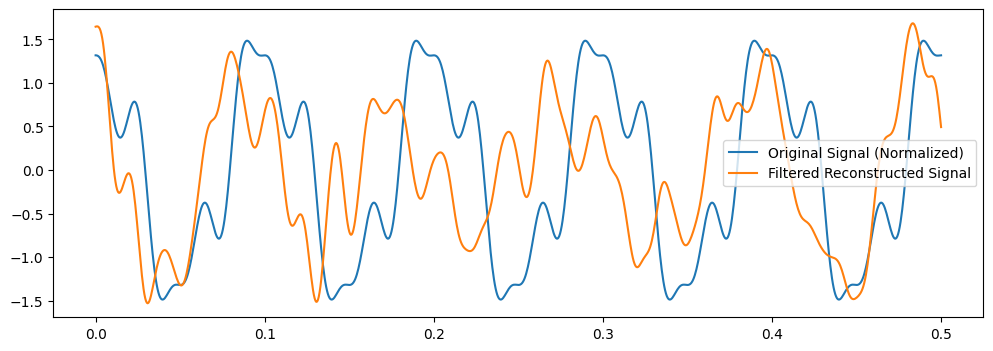

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 400  # Correct Nyquist frequency calculation
    normal_cutoff = cutoff / nyq  # Normalize the cutoff frequency
    b, a = sig.butter(order, normal_cutoff, btype='low', analog=False)
    y = sig.filtfilt(b, a, data)
    return y

fs = 1 / T  # Sampling frequency

# Use the low-pass filter function after reconstructing the signal
cutoff_freq = 30  # Cutoff frequency for the low-pass filter
reconstructed_signal_real_filtered = butter_lowpass_filter(reconstructed_signal_real, cutoff=cutoff_freq, fs=fs)

# Plot the comparison with the filtered signal
plt.figure(figsize=(12, 4))
plt.plot(t, xt_normalized, label='Original Signal (Normalized)')
plt.plot(t, reconstructed_signal_real_filtered, label='Filtered Reconstructed Signal')
plt.legend()
plt.show()